# First part is for inputing the dataset and cleaning the data. Only first 10000 rows input here for easy calcualation

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('kindle_reviews.csv',nrows=10000)

In [2]:
#find the null value of the dataset
data.isna().sum()/len(data)

Unnamed: 0        0.0000
asin              0.0000
helpful           0.0000
overall           0.0000
reviewText        0.0000
reviewTime        0.0000
reviewerID        0.0000
reviewerName      0.0031
summary           0.0000
unixReviewTime    0.0000
dtype: float64

In [3]:
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [4]:
#define function for cleaning data
def cleanDF(dataframe):   
    #remove rows with no reviewerName 
    modified_df = data.dropna(axis = 0, subset = ['reviewerName'])
    
    #reset index
    modified_df = modified_df.reset_index().drop('Unnamed: 0', axis=1)
    
    return modified_df

In [5]:
clean_df=cleanDF(data)

In [6]:
#check clean or not here
clean_df.isna().sum()

index             0
asin              0
helpful           0
overall           0
reviewText        0
reviewTime        0
reviewerID        0
reviewerName      0
summary           0
unixReviewTime    0
dtype: int64

In [7]:
#clean_df.to_csv('clear_reviews.csv')

# The second part is for feature selection and engineering

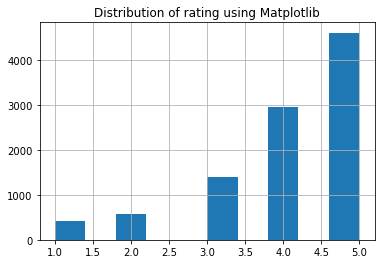

In [8]:
clean_df.overall.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [9]:
clean_df["overall"].value_counts()

5    4616
4    2953
3    1400
2     577
1     423
Name: overall, dtype: int64

In [10]:
def featureEngin(dataframe):

    #word counts for each review
    dataframe['review_word_count'] = dataframe['reviewText'].str.split().str.len()
    
    #number of reviews per reviewer
    map_numreviews = dataframe['reviewerID'].value_counts().to_dict()
    dataframe['multipleReviews_reviewer'] = dataframe['reviewerID'].map(map_numreviews)
    #binary
    dataframe['multipleReviews_reviewer'] = np.where(dataframe['multipleReviews_reviewer'] > 1, 1, 0)
    
    #if only five or one overall rating
    map_five = dataframe['overall'].groupby(dataframe['reviewerID']).agg(lambda x: (np.unique(x)==5).all()).to_dict()
    map_one = dataframe['overall'].groupby(dataframe['reviewerID']).agg(lambda x: (np.unique(x)==1).all()).to_dict()

    dataframe['reviewer_five_star_only'] = dataframe['reviewerID'].map(map_five)
    dataframe['reviewer_one_star_only'] = dataframe['reviewerID'].map(map_one)
    #convert to binary
    dataframe['reviewer_five_star_only'] = dataframe['reviewer_five_star_only'].astype(int)
    dataframe['reviewer_one_star_only'] = dataframe['reviewer_one_star_only'].astype(int)

    map_numreviews = dataframe['asin'].value_counts().to_dict()
    dataframe['numReviews_product'] = dataframe['asin'].map(map_numreviews) 

    return dataframe

In [11]:
new_df = featureEngin(clean_df)

In [12]:
#normalization
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
#select integer features of new_df and normalize thm
df1=new_df.select_dtypes(include=['int32','int64']) 
df2 = mn.fit_transform(df1)

In [13]:
df_scaled = pd.DataFrame(df2, columns = df1.columns)

In [14]:
df_scaled.head()

,index,overall,unixReviewTime,review_word_count,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product
0,0.0000,1.00,0.986602,0.024130,0.0,1.0,0.0,0.063636
1,0.0001,0.75,0.963495,0.036659,1.0,0.0,0.0,0.063636
2,0.0002,0.75,0.980583,0.028306,0.0,0.0,0.0,0.063636
3,0.0003,1.00,0.972039,0.008817,1.0,0.0,0.0,0.063636
4,0.0004,0.75,0.977476,0.010673,0.0,0.0,0.0,0.063636


# The third part is for normalizing and vectorizing the review text

In [15]:
#import packages for normalizing and vectorizing
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import  CountVectorizer
%run Text_Normalization_Function.ipynb
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
bow_vectorizer = CountVectorizer(max_features=3000) #control max feature for 3000

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sufante/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sufante/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sufante/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/sufante/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sufante/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#convert review text to array
reviews = np.array(new_df['reviewText'])

In [17]:
#normalize the reviews and control the max feature for 3000
normalized_reviews = normalize_corpus(reviews)

In [18]:
#vectorize the normalized review text
bow_corpus = bow_vectorizer.fit_transform(normalized_reviews)

In [19]:
#convert sparse matrix to dataframe
corpus_bow_table = pd.DataFrame(data = bow_corpus.todense(), columns = bow_vectorizer.get_feature_names())

In [20]:
corpus_bow_table.head()

,1st,2nd,3rd,abandon,abby,ability,able,abrupt,abruptly,absolute,...,yes,yet,york,young,youth,yummy,zane,zombie,zone,zsadist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#concat scaled dataframe (fisrt 8 columns and vectorized review text dataframe)
df_final = pd.concat([new_df['reviewerID'], df_scaled, corpus_bow_table], axis = 1)
df_final.head()

,reviewerID,index,overall,unixReviewTime,review_word_count,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,1st,...,yes,yet,york,young,youth,yummy,zane,zombie,zone,zsadist
0,A1F6404F1VG29J,0.0000,1.00,0.986602,0.024130,0.0,1.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
1,AN0N05A9LIJEQ,0.0001,0.75,0.963495,0.036659,1.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
2,A795DMNCJILA6,0.0002,0.75,0.980583,0.028306,0.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
3,A1FV0SX13TWVXQ,0.0003,1.00,0.972039,0.008817,1.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
4,A3SPTOKDG7WBLN,0.0004,0.75,0.977476,0.010673,0.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#export cleaned, normalized and vectorized dataframe for further using
df_final.to_csv('final_review.csv')